# Imports

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTEN

# Using Preprocessed Version 6
Currently in Preprocessing_v3.ipynb

In [2]:
X_train_nonsmote = pd.read_csv('xy_train_v6.csv', index_col=False)
y_train_nonsmote = X_train_nonsmote[["redlistCategory"]]
X_train_nonsmote = X_train_nonsmote.drop(columns=['internalTaxonId', 'Unnamed: 0', "redlistCategory"])

In [3]:
X_test_nonsmote = pd.read_csv('xy_test_v6.csv', index_col=False)
y_test_nonsmote = X_test_nonsmote[["redlistCategory"]]
X_test_nonsmote = X_test_nonsmote.drop(columns=['internalTaxonId', 'Unnamed: 0', "redlistCategory"])

In [4]:
#set random seed
tf.random.set_seed(42)
#create the model
nn_200=tf.keras.Sequential([
    tf.keras.layers.Dense(len(X_train_nonsmote.columns), activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")
])
#compile the model
nn_200.compile(
   #loss='categorical_crossentropy',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")
#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 )
#fit the model
epoch_num = 14
fit_lr_history =nn_200.fit(
   X_train_nonsmote,
   y_train_nonsmote,
   epochs=epoch_num,
   callbacks=[lr_scheduler],
   validation_data=(X_test_nonsmote,y_test_nonsmote),
   verbose=1)

Epoch 1/14

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1342/1342 [==============================] - 19s 14ms/step - loss: 0.2853 - accuracy: 0.8825 - val_loss: 0.2562 - val_accuracy: 0.8951
Epoch 2/14
1342/1342 [==============================] - 19s 14ms/step - loss: 0.2261 - accuracy: 0.9060 - val_loss: 0.2575 - val_accuracy: 0.8929
Epoch 3/14
1342/1342 [==============================] - 19s 14ms/step - loss: 0.1927 - accuracy: 0.9199 - val_loss: 0.2508 - val_accuracy: 0.9013
Epoch 4/14
1342/1342 [==============================] - 19s 14ms/step 

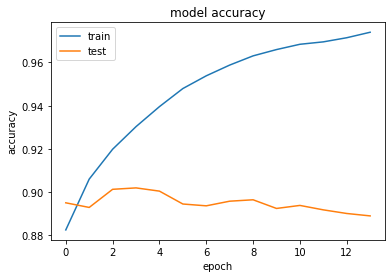

In [5]:
plt.plot(fit_lr_history.history['accuracy'])
plt.plot(fit_lr_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
y_pred_nonsmote = nn_200.predict(X_test_nonsmote)
y_pred_nonsmote = [np.argmax(x) for x in y_pred_nonsmote]

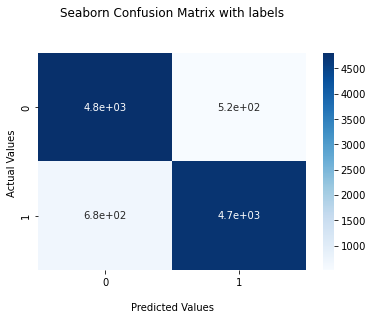

In [7]:
cf_matrix_nonsmote = confusion_matrix(y_test_nonsmote, y_pred_nonsmote)
ax_nonsmote = sns.heatmap(cf_matrix_nonsmote, annot=True, cmap='Blues')

ax_nonsmote.set_title('Seaborn Confusion Matrix with labels\n\n')
ax_nonsmote.set_xlabel('\nPredicted Values')
ax_nonsmote.set_ylabel('Actual Values ')
plt.show()

In [8]:
print(classification_report(y_test_nonsmote, y_pred_nonsmote, target_names=[str(i) for i in range(2)]))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5326
           1       0.90      0.88      0.89      5406

    accuracy                           0.89     10732
   macro avg       0.89      0.89      0.89     10732
weighted avg       0.89      0.89      0.89     10732



## L1 regularization (all layers)

In [29]:
#set random seed
tf.random.set_seed(42)
#create the model
nn_200=tf.keras.Sequential([
    tf.keras.layers.Dense(len(X_train_nonsmote.columns), activation="relu"),
    tf.keras.layers.Dense(70,activation="relu", kernel_regularizer="l1"),
    tf.keras.layers.Dense(70,activation="relu", kernel_regularizer="l1"),
    tf.keras.layers.Dense(30,activation="relu", kernel_regularizer="l1"),
    tf.keras.layers.Dense(10,activation="relu", kernel_regularizer="l1"),
    tf.keras.layers.Dense(2,activation="softmax")
])
#compile the model
nn_200.compile(
   #loss='categorical_crossentropy',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")
#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 )
#fit the model
epoch_num = 14
fit_lr_history =nn_200.fit(
   X_train_nonsmote,
   y_train_nonsmote,
   epochs=epoch_num,
   callbacks=[lr_scheduler],
   validation_data=(X_test_nonsmote,y_test_nonsmote),
   verbose=1)

Epoch 1/14

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1342/1342 [==============================] - 13s 9ms/step - loss: 1.5835 - accuracy: 0.8710 - val_loss: 0.4974 - val_accuracy: 0.8782
Epoch 2/14
1342/1342 [==============================] - 12s 9ms/step - loss: 0.4673 - accuracy: 0.8855 - val_loss: 0.4612 - val_accuracy: 0.8825
Epoch 3/14
1342/1342 [==============================] - 12s 9ms/step - loss: 0.4387 - accuracy: 0.8923 - val_loss: 0.4505 - val_accuracy: 0.8813
Epoch 4/14
1342/1342 [==============================] - 12s 9ms/step - lo

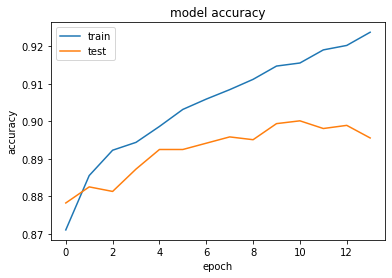

In [30]:
plt.plot(fit_lr_history.history['accuracy'])
plt.plot(fit_lr_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
y_pred_nonsmote = nn_200.predict(X_test_nonsmote)
y_pred_nonsmote = [np.argmax(x) for x in y_pred_nonsmote]

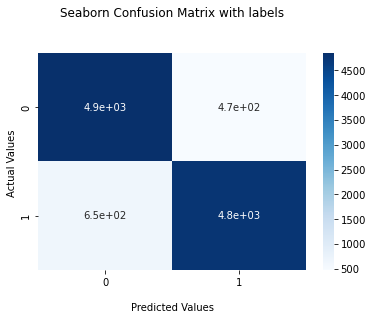

In [32]:
cf_matrix_nonsmote = confusion_matrix(y_test_nonsmote, y_pred_nonsmote)
ax_nonsmote = sns.heatmap(cf_matrix_nonsmote, annot=True, cmap='Blues')

ax_nonsmote.set_title('Seaborn Confusion Matrix with labels\n\n')
ax_nonsmote.set_xlabel('\nPredicted Values')
ax_nonsmote.set_ylabel('Actual Values ')
plt.show()

In [33]:
print(classification_report(y_test_nonsmote, y_pred_nonsmote, target_names=[str(i) for i in range(2)]))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      5326
           1       0.91      0.88      0.89      5406

    accuracy                           0.90     10732
   macro avg       0.90      0.90      0.90     10732
weighted avg       0.90      0.90      0.90     10732



## One hidden layer

In [9]:
#set random seed
tf.random.set_seed(42)
#create the model
nn_200=tf.keras.Sequential([
    tf.keras.layers.Dense(len(X_train_nonsmote.columns), activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")
])
#compile the model
nn_200.compile(
   #loss='categorical_crossentropy',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")
#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 )
#fit the model
epoch_num = 14
fit_lr_history =nn_200.fit(
   X_train_nonsmote,
   y_train_nonsmote,
   epochs=epoch_num,
   callbacks=[lr_scheduler],
   validation_data=(X_test_nonsmote,y_test_nonsmote),
   verbose=1)

Epoch 1/14

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1342/1342 [==============================] - 19s 14ms/step - loss: 0.2809 - accuracy: 0.8838 - val_loss: 0.2537 - val_accuracy: 0.8964
Epoch 2/14
1342/1342 [==============================] - 18s 14ms/step - loss: 0.2218 - accuracy: 0.9073 - val_loss: 0.2582 - val_accuracy: 0.8954
Epoch 3/14
1342/1342 [==============================] - 18s 14ms/step - loss: 0.1893 - accuracy: 0.9208 - val_loss: 0.2527 - val_accuracy: 0.8991
Epoch 4/14
1342/1342 [==============================] - 18s 14ms/step 

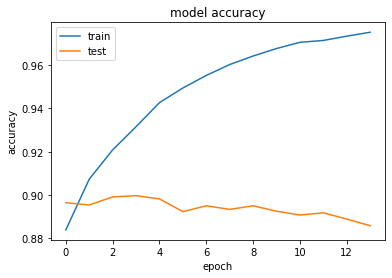

In [10]:
plt.plot(fit_lr_history.history['accuracy'])
plt.plot(fit_lr_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
y_pred_nonsmote = nn_200.predict(X_test_nonsmote)
y_pred_nonsmote = [np.argmax(x) for x in y_pred_nonsmote]

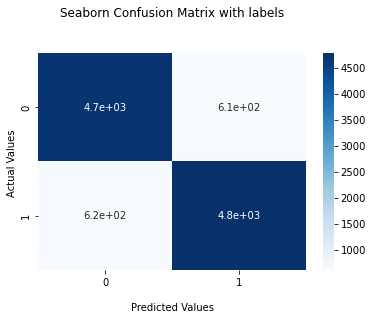

In [12]:
cf_matrix_nonsmote = confusion_matrix(y_test_nonsmote, y_pred_nonsmote)
ax_nonsmote = sns.heatmap(cf_matrix_nonsmote, annot=True, cmap='Blues')

ax_nonsmote.set_title('Seaborn Confusion Matrix with labels\n\n')
ax_nonsmote.set_xlabel('\nPredicted Values')
ax_nonsmote.set_ylabel('Actual Values ')
plt.show()

In [13]:
print(classification_report(y_test_nonsmote, y_pred_nonsmote, target_names=[str(i) for i in range(2)]))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      5326
           1       0.89      0.89      0.89      5406

    accuracy                           0.89     10732
   macro avg       0.89      0.89      0.89     10732
weighted avg       0.89      0.89      0.89     10732



### More neurons in hidden layer

In [14]:
#set random seed
tf.random.set_seed(42)
#create the model
nn_200=tf.keras.Sequential([
    tf.keras.layers.Dense(len(X_train_nonsmote.columns), activation="relu"),
    tf.keras.layers.Dense(len(X_train_nonsmote.columns)//2,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")
])
#compile the model
nn_200.compile(
   #loss='categorical_crossentropy',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")
#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 )
#fit the model
epoch_num = 14
fit_lr_history =nn_200.fit(
   X_train_nonsmote,
   y_train_nonsmote,
   epochs=epoch_num,
   callbacks=[lr_scheduler],
   validation_data=(X_test_nonsmote,y_test_nonsmote),
   verbose=1)

Epoch 1/14

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1342/1342 [==============================] - 29s 21ms/step - loss: 0.2798 - accuracy: 0.8841 - val_loss: 0.2555 - val_accuracy: 0.8969
Epoch 2/14
1342/1342 [==============================] - 28s 21ms/step - loss: 0.2208 - accuracy: 0.9070 - val_loss: 0.2565 - val_accuracy: 0.8951
Epoch 3/14
1342/1342 [==============================] - 29s 21ms/step - loss: 0.1870 - accuracy: 0.9220 - val_loss: 0.2521 - val_accuracy: 0.8987
Epoch 4/14
1342/1342 [==============================] - 29s 21ms/step 

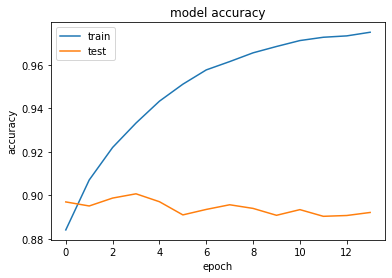

In [15]:
plt.plot(fit_lr_history.history['accuracy'])
plt.plot(fit_lr_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
y_pred_nonsmote = nn_200.predict(X_test_nonsmote)
y_pred_nonsmote = [np.argmax(x) for x in y_pred_nonsmote]

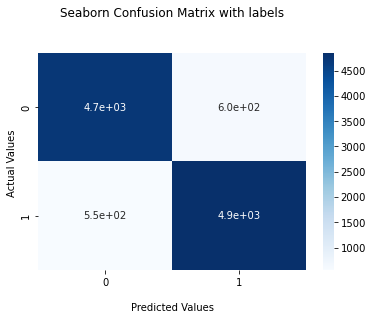

In [17]:
cf_matrix_nonsmote = confusion_matrix(y_test_nonsmote, y_pred_nonsmote)
ax_nonsmote = sns.heatmap(cf_matrix_nonsmote, annot=True, cmap='Blues')

ax_nonsmote.set_title('Seaborn Confusion Matrix with labels\n\n')
ax_nonsmote.set_xlabel('\nPredicted Values')
ax_nonsmote.set_ylabel('Actual Values ')
plt.show()

In [18]:
print(classification_report(y_test_nonsmote, y_pred_nonsmote, target_names=[str(i) for i in range(2)]))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      5326
           1       0.89      0.90      0.89      5406

    accuracy                           0.89     10732
   macro avg       0.89      0.89      0.89     10732
weighted avg       0.89      0.89      0.89     10732



### L1 regularization

In [19]:
#set random seed
tf.random.set_seed(42)
#create the model
nn_200=tf.keras.Sequential([
    tf.keras.layers.Dense(len(X_train_nonsmote.columns), activation="relu"),
    tf.keras.layers.Dense(len(X_train_nonsmote.columns)//2,activation="relu", kernel_regularizer="l1"),
    tf.keras.layers.Dense(2,activation="softmax")
])
#compile the model
nn_200.compile(
   #loss='categorical_crossentropy',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")
#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 )
#fit the model
epoch_num = 14
fit_lr_history =nn_200.fit(
   X_train_nonsmote,
   y_train_nonsmote,
   epochs=epoch_num,
   callbacks=[lr_scheduler],
   validation_data=(X_test_nonsmote,y_test_nonsmote),
   verbose=1)

Epoch 1/14

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1342/1342 [==============================] - 32s 24ms/step - loss: 4.1980 - accuracy: 0.8649 - val_loss: 1.0910 - val_accuracy: 0.8762
Epoch 2/14
1342/1342 [==============================] - 32s 24ms/step - loss: 1.0737 - accuracy: 0.8835 - val_loss: 1.0735 - val_accuracy: 0.8807
Epoch 3/14
1342/1342 [==============================] - 32s 24ms/step - loss: 1.0482 - accuracy: 0.8896 - val_loss: 1.0540 - val_accuracy: 0.8810
Epoch 4/14
1342/1342 [==============================] - 31s 23ms/step 

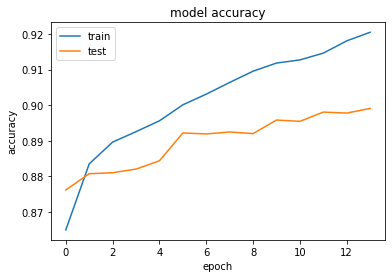

In [20]:
plt.plot(fit_lr_history.history['accuracy'])
plt.plot(fit_lr_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
y_pred_nonsmote = nn_200.predict(X_test_nonsmote)
y_pred_nonsmote = [np.argmax(x) for x in y_pred_nonsmote]

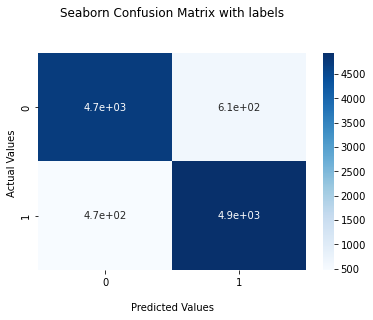

In [22]:
cf_matrix_nonsmote = confusion_matrix(y_test_nonsmote, y_pred_nonsmote)
ax_nonsmote = sns.heatmap(cf_matrix_nonsmote, annot=True, cmap='Blues')

ax_nonsmote.set_title('Seaborn Confusion Matrix with labels\n\n')
ax_nonsmote.set_xlabel('\nPredicted Values')
ax_nonsmote.set_ylabel('Actual Values ')
plt.show()

In [23]:
print(classification_report(y_test_nonsmote, y_pred_nonsmote, target_names=[str(i) for i in range(2)]))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      5326
           1       0.89      0.91      0.90      5406

    accuracy                           0.90     10732
   macro avg       0.90      0.90      0.90     10732
weighted avg       0.90      0.90      0.90     10732



### L2 regularization

In [24]:
#set random seed
tf.random.set_seed(42)
#create the model
nn_200=tf.keras.Sequential([
    tf.keras.layers.Dense(len(X_train_nonsmote.columns), activation="relu"),
    tf.keras.layers.Dense(len(X_train_nonsmote.columns)//2,activation="relu", kernel_regularizer="l2"),
    tf.keras.layers.Dense(2,activation="softmax")
])
#compile the model
nn_200.compile(
   #loss='categorical_crossentropy',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")
#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 )
#fit the model
epoch_num = 14
fit_lr_history =nn_200.fit(
   X_train_nonsmote,
   y_train_nonsmote,
   epochs=epoch_num,
   callbacks=[lr_scheduler],
   validation_data=(X_test_nonsmote,y_test_nonsmote),
   verbose=1)

Epoch 1/14

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1342/1342 [==============================] - 32s 24ms/step - loss: 0.4341 - accuracy: 0.8785 - val_loss: 0.2803 - val_accuracy: 0.8946
Epoch 2/14
1342/1342 [==============================] - 31s 23ms/step - loss: 0.2639 - accuracy: 0.9003 - val_loss: 0.2731 - val_accuracy: 0.8972
Epoch 3/14
1342/1342 [==============================] - 32s 24ms/step - loss: 0.2386 - accuracy: 0.9101 - val_loss: 0.2875 - val_accuracy: 0.8882
Epoch 4/14
1342/1342 [==============================] - 30s 22ms/step 

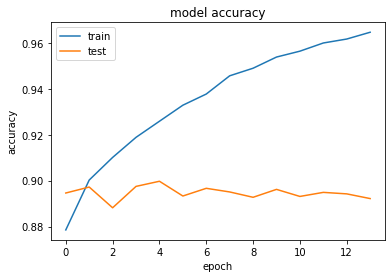

In [25]:
plt.plot(fit_lr_history.history['accuracy'])
plt.plot(fit_lr_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
y_pred_nonsmote = nn_200.predict(X_test_nonsmote)
y_pred_nonsmote = [np.argmax(x) for x in y_pred_nonsmote]

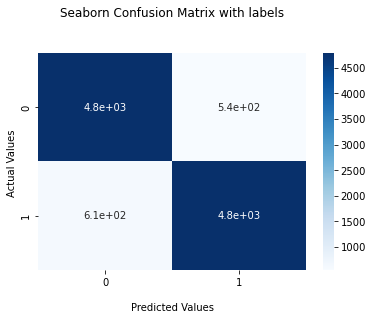

In [27]:
cf_matrix_nonsmote = confusion_matrix(y_test_nonsmote, y_pred_nonsmote)
ax_nonsmote = sns.heatmap(cf_matrix_nonsmote, annot=True, cmap='Blues')

ax_nonsmote.set_title('Seaborn Confusion Matrix with labels\n\n')
ax_nonsmote.set_xlabel('\nPredicted Values')
ax_nonsmote.set_ylabel('Actual Values ')
plt.show()

In [28]:
print(classification_report(y_test_nonsmote, y_pred_nonsmote, target_names=[str(i) for i in range(2)]))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      5326
           1       0.90      0.89      0.89      5406

    accuracy                           0.89     10732
   macro avg       0.89      0.89      0.89     10732
weighted avg       0.89      0.89      0.89     10732

